In [1]:
%autosave 0

Autosave disabled


In [7]:
import os
import sys
import pandas as pd
from pandas import to_datetime
import numpy as np

In [8]:
# Import findspark and initialize. 
import zipfile
import findspark
findspark.init()


#####Using Pyspark to read the data###########

In [9]:
# Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder\
    .appName("SparkSQL")\
    .config("spark.sql.debug.maxToStringFields", 2000)\
    .config("spark.driver.memory", "2g")\
    .getOrCreate()

In [19]:
# Read in data from S3 Bucket
from pyspark import SparkFiles
#citibike_url = "https://s3.amazonaws.com/tripdata/index.html/2020-citibike-tripdata.zip"
#spark.sparkContext.addFile(citibike_url)

citibike_df = spark.read.csv('2020-citibike-tripdata/3_March/202003-citibike-tripdata_1.csv', inferSchema=True, sep=",",header=True)

# Show the delayed flight data.
#citibike_df.show()
citibike_df.head(10)

Row(tripduration=1589, starttime=datetime.datetime(2020, 3, 1, 0, 0, 3, 640000), stoptime=datetime.datetime(2020, 3, 1, 0, 26, 32, 986000), start station id=224, start station name='Spruce St & Nassau St', start station latitude=40.71146364, start station longitude=-74.00552427, end station id=3574, end station name='Prospect Pl & Underhill Ave', end station latitude=40.6769694, end station longitude=-73.96579, bikeid=16214, usertype='Subscriber', birth year=1980, gender=1)

In [21]:
citibike_df.head(10)

[Row(tripduration=1589, starttime=datetime.datetime(2020, 3, 1, 0, 0, 3, 640000), stoptime=datetime.datetime(2020, 3, 1, 0, 26, 32, 986000), start station id=224, start station name='Spruce St & Nassau St', start station latitude=40.71146364, start station longitude=-74.00552427, end station id=3574, end station name='Prospect Pl & Underhill Ave', end station latitude=40.6769694, end station longitude=-73.96579, bikeid=16214, usertype='Subscriber', birth year=1980, gender=1),
 Row(tripduration=389, starttime=datetime.datetime(2020, 3, 1, 0, 0, 16, 756000), stoptime=datetime.datetime(2020, 3, 1, 0, 6, 46, 62000), start station id=293, start station name='Lafayette St & E 8 St', start station latitude=40.73020660529954, start station longitude=-73.99102628231049, end station id=223, end station name='W 13 St & 7 Ave', end station latitude=40.73781509, end station longitude=-73.99994661, bikeid=29994, usertype='Subscriber', birth year=1991, gender=2),
 Row(tripduration=614, starttime=date

In [24]:
citibike_df.summary().show()

+-------+------------------+------------------+--------------------+----------------------+-----------------------+------------------+--------------------+--------------------+---------------------+-----------------+----------+------------------+------------------+
|summary|      tripduration|  start station id|  start station name|start station latitude|start station longitude|    end station id|    end station name|end station latitude|end station longitude|           bikeid|  usertype|        birth year|            gender|
+-------+------------------+------------------+--------------------+----------------------+-----------------------+------------------+--------------------+--------------------+---------------------+-----------------+----------+------------------+------------------+
|  count|           1000000|           1000000|             1000000|               1000000|                1000000|           1000000|             1000000|             1000000|              1000000|    

#### Using Pandas to read the data #######

In [31]:
df=pd.read_csv('2020-citibike-tripdata/3_March/202003-citibike-tripdata_1.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1589,2020-03-01 00:00:03.6400,2020-03-01 00:26:32.9860,224,Spruce St & Nassau St,40.711464,-74.005524,3574,Prospect Pl & Underhill Ave,40.676969,-73.965790,16214,Subscriber,1980,1
1,389,2020-03-01 00:00:16.7560,2020-03-01 00:06:46.0620,293,Lafayette St & E 8 St,40.730207,-73.991026,223,W 13 St & 7 Ave,40.737815,-73.999947,29994,Subscriber,1991,2
2,614,2020-03-01 00:00:20.0580,2020-03-01 00:10:34.2200,379,W 31 St & 7 Ave,40.749156,-73.991600,515,W 43 St & 10 Ave,40.760094,-73.994618,39853,Subscriber,1991,1
3,597,2020-03-01 00:00:24.3510,2020-03-01 00:10:22.3390,3739,Perry St & Greenwich Ave,40.735918,-74.000939,325,E 19 St & 3 Ave,40.736245,-73.984738,42608,Subscriber,1989,1
4,1920,2020-03-01 00:00:26.1120,2020-03-01 00:32:26.2680,236,St Marks Pl & 2 Ave,40.728419,-73.987140,3124,46 Ave & 5 St,40.747310,-73.954510,36288,Subscriber,1993,1


In [32]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

####Some of the columns can be changed to categories to reduce on the memory usage####

In [33]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,tripduration,9826,int64,8000128
1,starttime,999566,datetime64[ns],8000128
2,stoptime,999520,datetime64[ns],8000128
3,start station id,889,int64,8000128
4,start station name,889,object,76596564
5,start station latitude,921,float64,8000128
6,start station longitude,911,float64,8000128
7,end station id,899,int64,8000128
8,end station name,899,object,76603305
9,end station latitude,928,float64,8000128


In [34]:
cols = ['start station name', 'end station name', 'bikeid', 'usertype', 'gender']
for col in cols:
    df[col] = df[col].astype('category')

In [35]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
  columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,tripduration,9826,int64,8000128
1,starttime,999566,datetime64[ns],8000128
2,stoptime,999520,datetime64[ns],8000128
3,start station id,889,int64,8000128
4,start station name,889,category,2102261
5,start station latitude,921,float64,8000128
6,start station longitude,911,float64,8000128
7,end station id,899,int64,8000128
8,end station name,899,category,2102969
9,end station latitude,928,float64,8000128


In [36]:
df.describe().round(2)

,tripduration,starttime,stoptime,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,birth year
count,1000000.00,1000000,1000000,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00,1000000.00
mean,1138.73,2020-03-11 18:27:58.018221824,2020-03-11 18:46:57.717082112,1797.16,40.74,-73.98,1791.63,40.74,-73.98,1979.93
min,61.00,2020-03-01 00:00:03.640000,2020-03-01 00:04:55.532000,72.00,40.66,-74.02,72.00,40.66,-74.07,1885.00
25%,376.00,2020-03-05 20:00:34.671249920,2020-03-05 20:14:20.533999872,399.00,40.72,-73.99,394.00,40.72,-73.99,1969.00
50%,671.00,2020-03-10 19:16:05.990000128,2020-03-10 19:32:00.424499968,528.00,40.74,-73.98,528.00,40.74,-73.98,1982.00
75%,1223.00,2020-03-16 08:20:48.479000064,2020-03-16 08:38:37.545999872,3357.00,40.76,-73.97,3357.00,40.76,-73.97,1990.00
max,3247190.00,2020-03-27 13:26:22.058000,2020-04-17 11:31:13.585000,3919.00,40.82,-73.90,3919.00,40.82,-73.90,2004.00
std,14068.90,NaN,NaN,1510.17,0.03,0.02,1510.62,0.03,0.02,12.53


In [38]:
df['tripminutes'] = df['tripduration'] // 60
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripminutes
0,1589,2020-03-01 00:00:03.640,2020-03-01 00:26:32.986,224,Spruce St & Nassau St,40.711464,-74.005524,3574,Prospect Pl & Underhill Ave,40.676969,-73.965790,16214,Subscriber,1980,1,26
1,389,2020-03-01 00:00:16.756,2020-03-01 00:06:46.062,293,Lafayette St & E 8 St,40.730207,-73.991026,223,W 13 St & 7 Ave,40.737815,-73.999947,29994,Subscriber,1991,2,6
2,614,2020-03-01 00:00:20.058,2020-03-01 00:10:34.220,379,W 31 St & 7 Ave,40.749156,-73.991600,515,W 43 St & 10 Ave,40.760094,-73.994618,39853,Subscriber,1991,1,10
3,597,2020-03-01 00:00:24.351,2020-03-01 00:10:22.339,3739,Perry St & Greenwich Ave,40.735918,-74.000939,325,E 19 St & 3 Ave,40.736245,-73.984738,42608,Subscriber,1989,1,9
4,1920,2020-03-01 00:00:26.112,2020-03-01 00:32:26.268,236,St Marks Pl & 2 Ave,40.728419,-73.987140,3124,46 Ave & 5 St,40.747310,-73.954510,36288,Subscriber,1993,1,32


C:\Users\kaiva\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


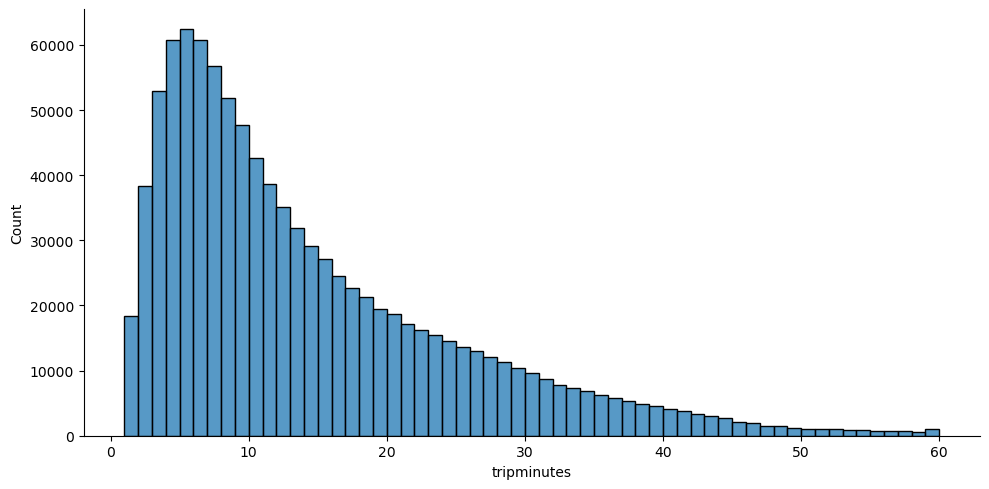

In [40]:
import seaborn as sns

sns.displot(data=df,x="tripminutes", bins=range(1,61), aspect=10/5);

This chart shows that the most common trip is five minutes long (the tallest bar) followed by four and six minutes (the bars before and after that one). After that the chart shows a classic “long tail” of fewer trips for longer rides.

In [41]:
df['start hour']=df['starttime'].dt.hour.astype('category')
df['start day']=df['starttime'].dt.day.astype('category') 
df['weekday']=df['starttime'].dt.weekday.astype('category')

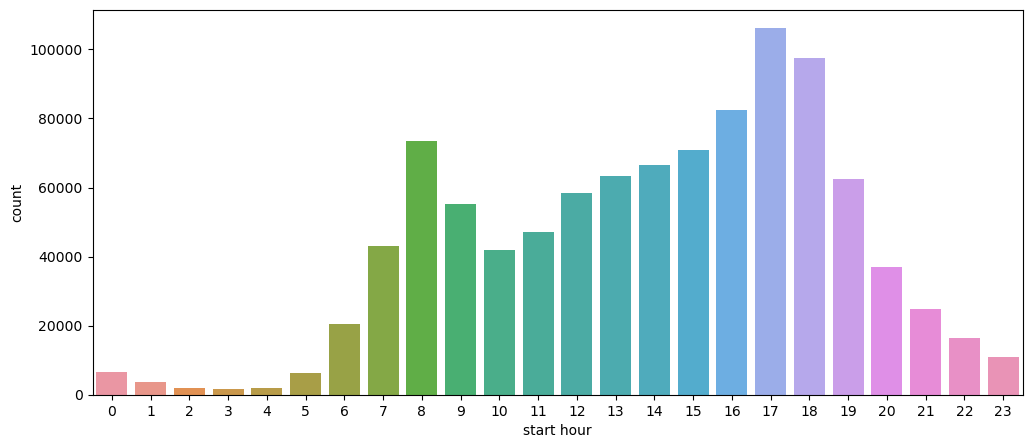

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.countplot(data=df, x="start hour" ) ;

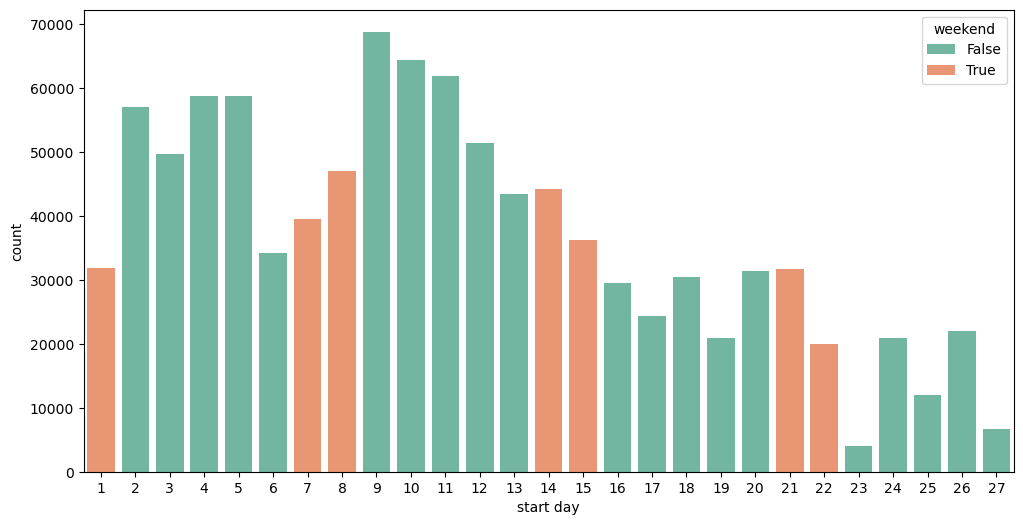

In [46]:
df['weekend'] = [d >= 5 for d in df['weekday']] # 0=monday
plt.figure(figsize=(12,6))
sns.set_palette("Set2")
sns.countplot(data=df,x="start day", hue='weekend', dodge=False) ;

In March 2020 , as the lockdown was announced we can see the dip in bike trips after Mach 12 

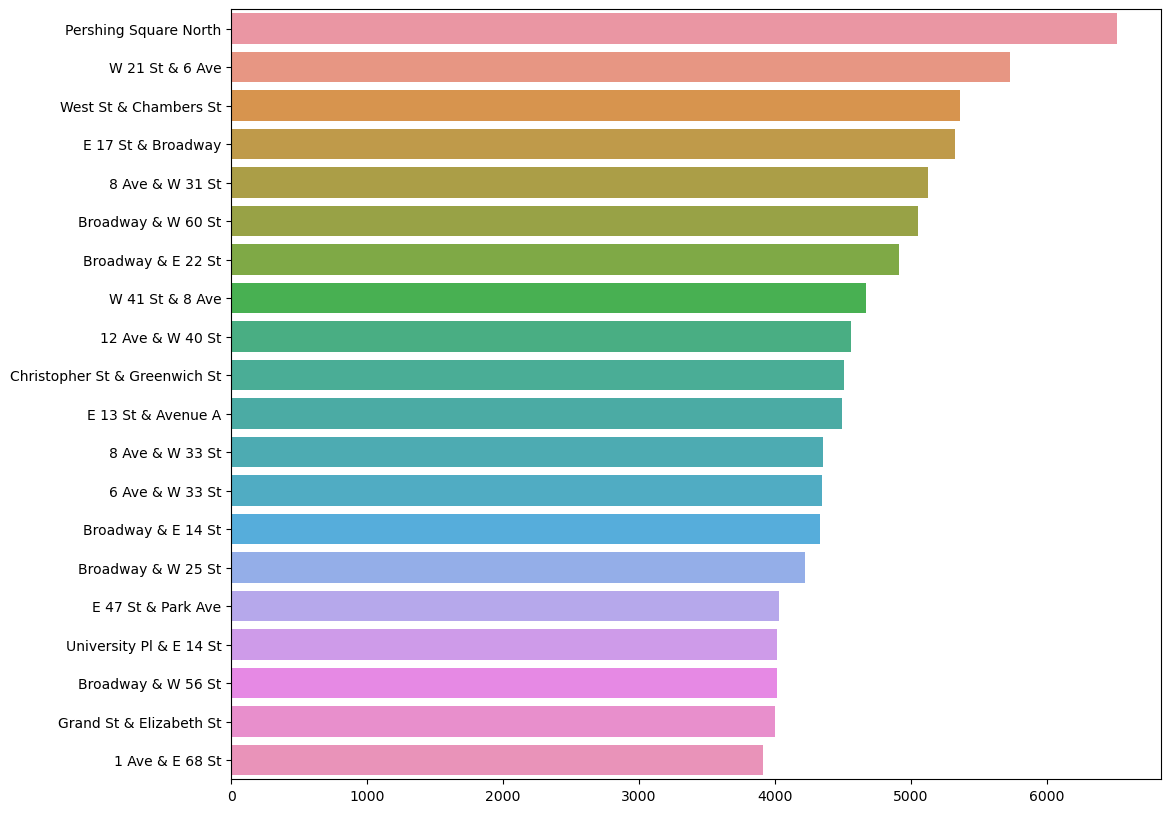

In [47]:
startstation = df['start station name'].value_counts()[:20]
plt.figure(figsize=(12,10))
sns.barplot( x=startstation.values , y=list(startstation.index), 
 orient="h"  ) ;

This shows the most frequently used station is Pershing Square North

C:\Users\kaiva\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


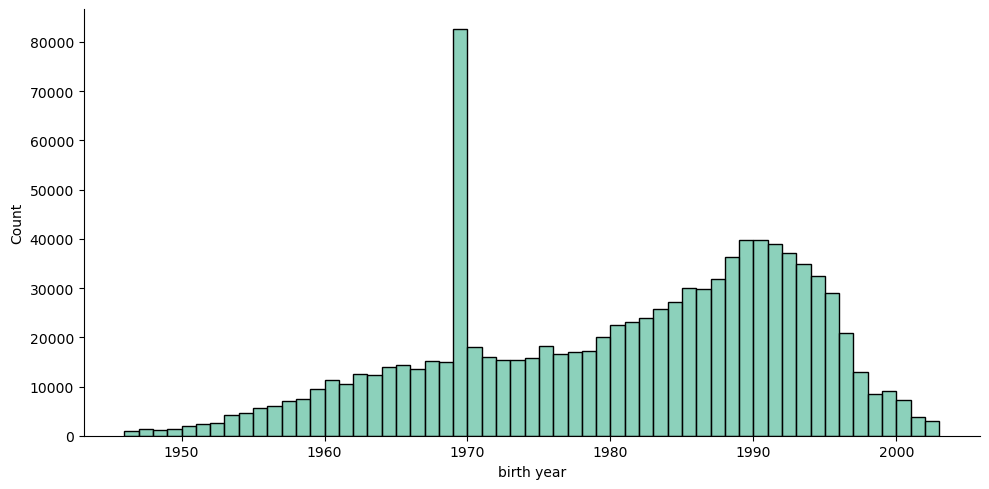

In [48]:
sns.displot(data=df, x="birth year" , bins=range(1946,2004),  aspect=10/5) ;

The year 1969 is noticeable .

In [49]:
skip = (df['birth year'] < 1946) | (df['gender'] == 0) 
df['age'] = (2020 - df['birth year']).mask(skip,None)

C:\Users\kaiva\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


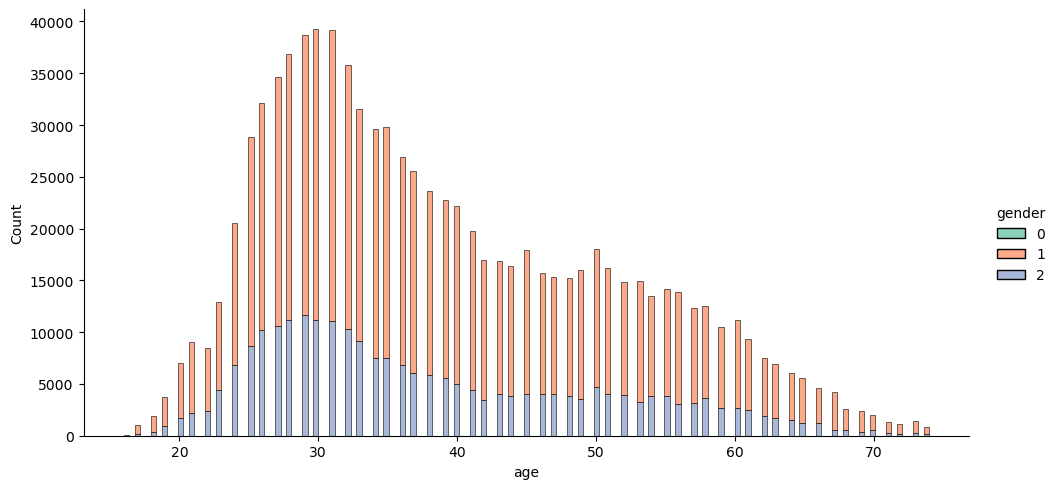

In [50]:
sns.displot(data=df, x='age', hue='gender', multiple='stack',  aspect=10/5) ;

Here the bars are colored by gender in order 0 (undeclared), 1 (male), 2 (female).(0 is skipped)
From here we can see the most common age (the mode) is 30, and indeed the most common ages cluster around it. We also now see that there are far more men than women using Citi Bike.

In [51]:
import numpy as np
def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = \
    map(np.radians ,[lon1, lat1, lon2, lat2])
    h = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    miles = 3959 * (2 * np.arcsin(np.sqrt(h))) 
    return miles

C:\Users\kaiva\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


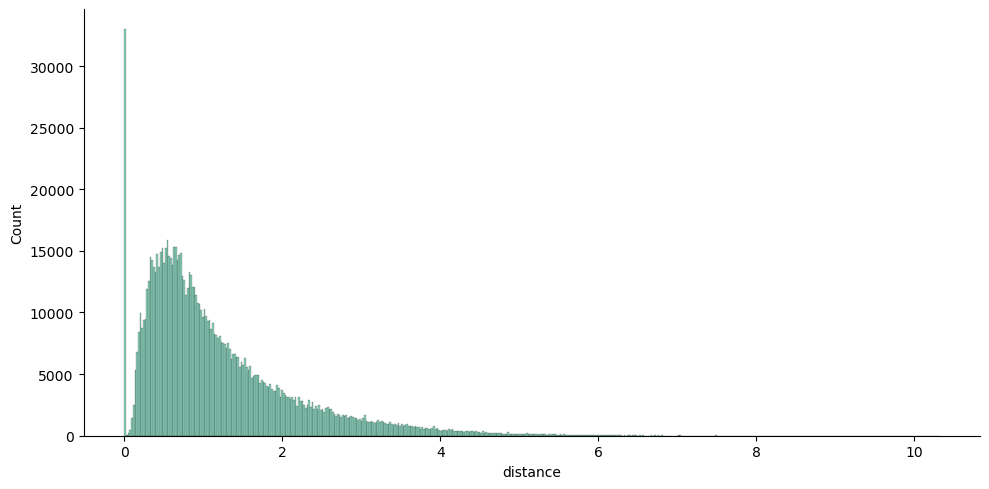

In [52]:
distance = haversine(df['start station latitude'],df['start station longitude'],df['end station latitude'],df['end station longitude'])
df['distance'] = distance
sns.displot(data=df, x="distance",  aspect=10/5  ) ;

In [ ]:
## Removing outliers with distance as 0

C:\Users\kaiva\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


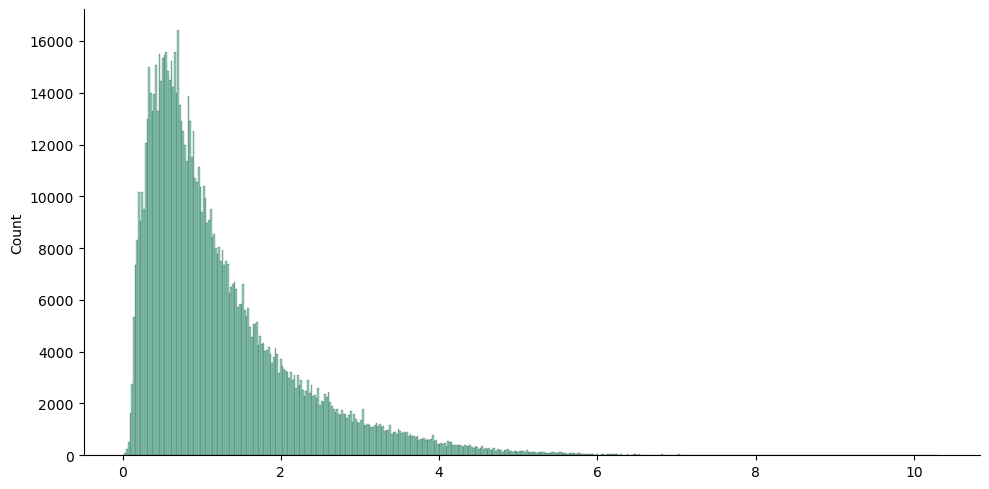

In [53]:
distance = list(filter(lambda distance: distance !=0 , distance)) 
sns.displot(x=distance ,  aspect=10/5  ) ;

In [54]:
df.to_parquet('202003-citibike-tripdata.parquet')